In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sir_spreading  import SIR_classical
from sir_spreading import SIR_threshold
from sir_spreading import SIR_cascade


In [2]:
G = nx.read_edgelist('M1/edges.csv', delimiter = ',')

In [3]:
# Specify the number of random nodes you want
num_random_nodes = 10  # You can change this number as needed

#select one raqndom node:
random_node = random.choice([i for i in range(G.number_of_nodes())])

# Select multiple random nodes
random_nodes = random.sample(sorted(G.nodes()), num_random_nodes)

random_nodes

['1051', '1029', '229', '929', '490', '383', '278', '1272', '737', '1255']

In [4]:
def get_starting_nodes(G, method,n):  
    if method == 'degree':
        # Calculate degree centrality
        node_dict = nx.degree_centrality(G)
    
    elif method  == 'closeness':
        node_dict = nx.closeness_centrality(G)

    elif method == 'betweenness':
        node_dict = nx.betweenness_centrality(G)
    
    elif method  == 'eigenvector':
        node_dict = nx.eigenvector_centrality(G)
    
    elif method == 'katz':
        node_dict = nx.katz_centrality(G)
    
    elif method == 'harmonic':
        node_dict = nx.harmonic_centrality(G)
    
    
    # Sort the dictionary items in descending order based on centrality values
    sorted_nodes = sorted(node_dict.items(), key=lambda x: x[1], reverse=True)
        
    top_10 = sorted_nodes[:n]
        
    # Extract only the node IDs from the sorted list
    top_node_ids = [node for node, _ in top_10]


    # Display the node IDs
    #print(top_10_node_ids)
    #print(top_10)
    return top_node_ids


In [5]:
get_starting_nodes(G, 'closeness',10)

['17', '41', '19', '49', '38', '537', '13', '1', '12', '534']

In [25]:
# #closeness centrality
# # Read the graph from the edgelist
# Gc = nx.read_edgelist('M1/edges.csv', delimiter=',')
# Gcc = nx.read_edgelist('M1/edges.csv', delimiter=',')

# nodes_to_remove_10 = get_starting_nodes(Gc,'closeness',10)
# nodes_to_remove_100 = get_starting_nodes(Gcc,'closeness',100)

# # Remove nodes from the graph
# Gc.remove_nodes_from(nodes_to_remove_10)
# Gcc.remove_nodes_from(nodes_to_remove_100)


# # Create a new graph without the specified nodes
# Gc_10 = Gc.subgraph([node for node in Gc.nodes if node not in nodes_to_remove_10])
# Gc_100 = Gcc.subgraph([node for node in Gcc.nodes if node not in nodes_to_remove_100])





In [5]:
def remove_nodes_by_centrality(graph, centrality_measure, num_nodes):
    """
    Remove nodes from a graph based on centrality measure.

    Parameters:
    - graph: NetworkX graph
    - centrality_measure: String, the centrality measure ('degree', 'closeness', 'betweenness', etc.)
    - num_nodes: Integer, the number of nodes to remove

    Returns:
    - new_graph: NetworkX graph without the specified nodes
    """

    # Make a copy of the graph to keep the original intact
    graph_copy = graph.copy()

    # Calculate centrality for each node
    centrality_values = None
    if centrality_measure == 'degree':
        centrality_values = nx.degree_centrality(graph)
    elif centrality_measure == 'closeness':
        centrality_values = nx.closeness_centrality(graph)
    elif centrality_measure == 'betweenness':
        centrality_values = nx.betweenness_centrality(graph)
    # Add more centrality measures as needed

    # Get the top num_nodes nodes based on centrality
    nodes_to_remove = sorted(centrality_values, key=centrality_values.get, reverse=True)[:num_nodes]

    # Remove nodes from the graph
    graph_copy.remove_nodes_from(nodes_to_remove)

    # Create a new graph without the specified nodes
    new_graph = graph.subgraph([node for node in graph.nodes if node not in nodes_to_remove])

    return new_graph

# Example usage:



In [6]:
G = nx.read_edgelist('M1/edges.csv', delimiter=',')
G_10_degree = remove_nodes_by_centrality(G, 'degree', 10)
G_100_degree = remove_nodes_by_centrality(G, 'degree', 100)
G_10_closeness = remove_nodes_by_centrality(G, 'closeness', 10)
G_100_closeness = remove_nodes_by_centrality(G, 'closeness', 100)
G_10_between = remove_nodes_by_centrality(G, 'betweenness', 10)
G_100_between = remove_nodes_by_centrality(G, 'betweenness', 100)

In [7]:
[len(c) for c in sorted(nx.connected_components(Gc_100), key=len, reverse=True)]


[1326, 1, 1, 1]

In [139]:
# classical_closeness_immune_10 = SIR_classical(G_10_degree, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G_10_degree, 'closeness',10) )
# classical_closeness_immune_100 = SIR_classical(G_100_degree, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G_100_degree, 'closeness',10) )
# classical_closeness = SIR_classical(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'closeness',10) )

# classical_degree_immune_10 = SIR_classical(G_10_closeness, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G_10_closeness, 'degree',10) )
# classical_degree_immune_100 = SIR_classical(G_100_closeness, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G_100_closeness, 'degree',10) )
# classical_degree= SIR_classical(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'degree',10) )

# classical_immunity_close = [
#     #classical_closeness_immune_10,
#     classical_closeness_immune_100,
#     classical_closeness,
# ]
# classical_immunity_degree = [
#     classical_degree_immune_10,
#     classical_degree_immune_100,
#     classical_closeness,
#]

In [137]:


# threshold_degree_immune_10 = SIR_threshold(G_10_degree, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G_10_degree, 'degree',10) )
# threshold_degree_immune_100 = SIR_threshold(G_100_degree, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G_10_degree, 'degree',10) )
# threshold_degree = SIR_threshold(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'degree',10) )


# threshold_closeness_immune_10 = SIR_threshold(G_10_closeness, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G_10_closeness, 'closeness',10) )
# threshold_closeness_immune_100 = SIR_threshold(G_100_closeness, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G_100_closeness, 'closeness',10) )
# threshold_closeness = SIR_threshold(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'closeness',10) )


# threshold_immunity_close = [
#     threshold_degree_immune_10,
#     threshold_degree_immune_100,
#     threshold_closeness
# ]
# threshold_immunity_degree = [
#     threshold_closeness_immune_10,
#     threshold_closeness_immune_100,
#     threshold_degree
# ]



In [145]:
# cascade_closeness_immune_10 = SIR_cascade(G_10_degree, beta=0.05, gamma=3, starting_nodes=get_starting_nodes(G_10_degree, 'closeness', 10))
# cascade_closeness_immune_100 = SIR_cascade(Gc_100, beta=0.05, gamma=3, starting_nodes=get_starting_nodes(Gc_100, 'closeness', 10))
# cascade_closeness = SIR_cascade(G, beta=0.05, gamma=3, starting_nodes=get_starting_nodes(G, 'closeness', 10))



# cascade_immunity = [
#     cascade_closeness_immune_10,
#     threshold_degree_immune_10,
#     cascade_closeness
# ]

In [7]:
threshold_degree_immune_10 = SIR_threshold(G_100_degree, kappa = 3, beta = 0.8, gamma = 3,starting_nodes= random_nodes )
threshold_closeness_immune_10 = SIR_threshold(G_100_closeness ,kappa = 3, beta = 0.8, gamma = 3,starting_nodes= random_nodes)
threshold_between_immune_10 = SIR_threshold(G_100_between,kappa = 3,  beta = 0.8, gamma = 3,starting_nodes= random_nodes )
threshold_degree = SIR_threshold(G, beta = 0.8,kappa = 3, gamma = 3,starting_nodes= random_nodes )

In [9]:
cascade_degree_immune_10 = SIR_cascade(G_100_degree,  beta = 0.05, gamma = 3,starting_nodes= random_nodes )
cascade_closeness_immune_10 = SIR_cascade(G_100_closeness , beta = 0.05, gamma = 3,starting_nodes= random_nodes)
cascade_between_immune_10 = SIR_cascade(G_100_between,  beta = 0.05, gamma = 3,starting_nodes= random_nodes )
cascade_random = SIR_cascade(G, beta = 0.05, gamma = 3,starting_nodes= random_nodes )

In [10]:
classical_degree_immune_10 = SIR_classical(G_100_degree,  beta = 0.3, gamma = 3,starting_nodes= random_nodes )
classical_closeness_immune_10 = SIR_classical(G_100_closeness , beta = 0.3, gamma = 3,starting_nodes= random_nodes)
classical_between_immune_10 = SIR_classical(G_100_between,  beta = 0.3, gamma = 3,starting_nodes= random_nodes )
classical_random = SIR_classical(G, beta = 0.3, gamma = 3,starting_nodes= random_nodes )

In [11]:
cascade_immunity = [
    cascade_closeness_immune_10,
    cascade_degree_immune_10,
    cascade_between_immune_10,
    cascade_random
]

In [13]:
threshold_immunity = [
    threshold_closeness_immune_10,
    threshold_degree_immune_10,
    threshold_between_immune_10,
    threshold_degree
]

In [14]:
classical_immunity = [
    classical_closeness_immune_10,
    classical_degree_immune_10,
    classical_between_immune_10,
    classical_random
]

In [55]:
def plot_immune(data_frames):
    methods = ['closeness centrality', 'degree centrality', 'betweenness centrality','no immunisation']
    # Define a custom color palette
    custom_palette = ['darkblue', 'blue', 'cornflowerblue', 'lightsteelblue']  # Add more colors if needed

    # Set the size of the plot
    plt.figure(figsize=(8, 4))  # Adjust the width and height as needed

    # Create a graph with the different df's
    for i, df_data in enumerate(data_frames):
        sns.lineplot(data=df_data, x='t', y='IR', label=f'Method {methods[i]}', color=custom_palette[i])

    # Add legend
    plt.legend()

    # Add labels and title if needed
    plt.xlabel('Time')
    plt.ylabel('IR')
    plt.title('Threshold')

    # Set x and y axis limits
    plt.xlim(0, 25)
    plt.ylim(0, 1)
    plt.savefig('Immunity_threshold.png')

    # Show the plot
    plt.show()
   


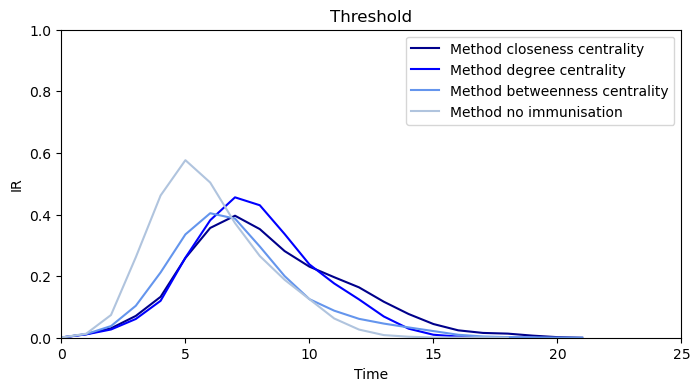

In [56]:
plot_immune(threshold_immunity)


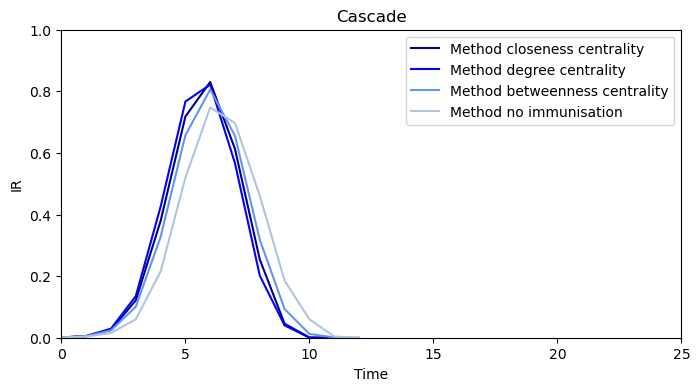

In [52]:
plot_immune(cascade_immunity)

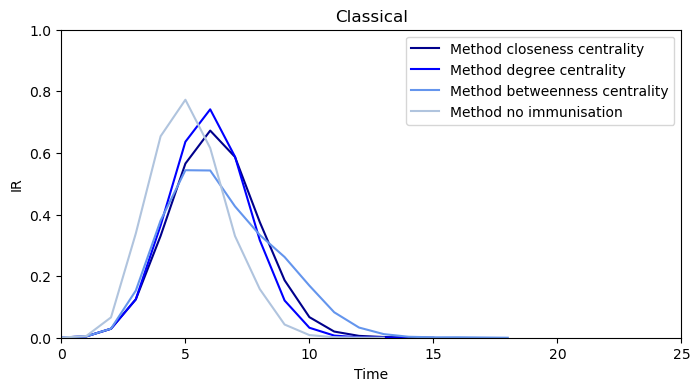

In [54]:
plot_immune(classical_immunity)